In [19]:
import pyspark

In [20]:
from pyspark.sql import SparkSession

In [21]:
spark = SparkSession.builder.appName('test').getOrCreate()

In [22]:
spark

In [23]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

In [24]:
dataset = spark.read.csv('HousingPrice.csv',inferSchema=True, header =True)

In [25]:
dataset.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- black: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [26]:
assembler = VectorAssembler(inputCols=['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat'], outputCol = 'Attributes')

output = assembler.transform(dataset)

final_data = output.select("Attributes","medv")

final_data.show()

+--------------------+----+
|          Attributes|medv|
+--------------------+----+
|[0.00632,18.0,2.3...|24.0|
|[0.02731,0.0,7.07...|21.6|
|[0.02729,0.0,7.07...|34.7|
|[0.03237,0.0,2.18...|33.4|
|[0.06905,0.0,2.18...|36.2|
|[0.02985,0.0,2.18...|28.7|
|[0.08829,12.5,7.8...|22.9|
|[0.14455,12.5,7.8...|27.1|
|[0.21124,12.5,7.8...|16.5|
|[0.17004,12.5,7.8...|18.9|
|[0.22489,12.5,7.8...|15.0|
|[0.11747,12.5,7.8...|18.9|
|[0.09378,12.5,7.8...|21.7|
|[0.62976,0.0,8.14...|20.4|
|[0.63796,0.0,8.14...|18.2|
|[0.62739,0.0,8.14...|19.9|
|[1.05393,0.0,8.14...|23.1|
|[0.7842,0.0,8.14,...|17.5|
|[0.80271,0.0,8.14...|20.2|
|[0.7258,0.0,8.14,...|18.2|
+--------------------+----+
only showing top 20 rows



In [27]:
train_data,test_data = final_data.randomSplit([0.8,0.2])


regressor = LinearRegression(featuresCol = 'Attributes', labelCol = 'medv')

regressor = regressor.fit(train_data)

pred = regressor.evaluate(test_data)

pred.predictions.show()

+--------------------+----+------------------+
|          Attributes|medv|        prediction|
+--------------------+----+------------------+
|[0.01096,55.0,2.2...|22.0|27.138775877064774|
|[0.01501,90.0,1.2...|50.0|43.419661187937315|
|[0.01709,90.0,2.0...|30.1|  25.2987720972136|
|[0.0187,85.0,4.15...|23.1|24.964468642499746|
|[0.03049,55.0,3.7...|31.2|28.007704283447218|
|[0.03502,80.0,4.9...|28.5| 33.33595181928613|
|[0.03615,80.0,4.9...|27.9|31.815939891566124|
|[0.03705,20.0,3.3...|35.4| 34.03696949641979|
|[0.03768,80.0,1.5...|34.6|34.275227614541954|
|[0.04113,25.0,4.8...|28.0|27.937609530383288|
|[0.04337,21.0,5.6...|20.5|24.114777575672257|
|[0.04462,25.0,4.8...|23.9|26.945442063231084|
|[0.04684,0.0,3.41...|22.6|27.238712140587616|
|[0.04741,0.0,11.9...|11.9|22.604729768950122|
|[0.04981,21.0,5.6...|23.4|23.851219862594505|
|[0.05059,0.0,4.49...|23.9|24.584123709517527|
|[0.05302,0.0,3.41...|28.7|30.512018195606462|
|[0.05372,0.0,13.9...|27.1|   26.706991461771|
|[0.0566,0.0,

In [28]:
coeff = regressor.coefficients

intr = regressor.intercept

print ("The coefficient of the model is : %a" %coeff)
print ("The Intercept of the model is : %f" %intr)


The coefficient of the model is : DenseVector([-0.1164, 0.0537, -0.0105, 1.9228, -17.1744, 3.1832, 0.0108, -1.5509, 0.3181, -0.0146, -0.9722, 0.0072, -0.5372])
The Intercept of the model is : 41.834527


In [29]:
from pyspark.ml.evaluation import RegressionEvaluator
eval = RegressionEvaluator(labelCol="medv", predictionCol="prediction", metricName="rmse")

rmse = eval.evaluate(pred.predictions)
print("RMSE: %.3f" % rmse)

RMSE: 5.084


In [30]:
r2 = eval.evaluate(pred.predictions, {eval.metricName: "r2"})
print("r2: %.3f" %r2)

r2: 0.668


In [31]:
from pyspark.sql import SQLContext
import seaborn as sns
import matplotlib.pyplot as plt
df = spark.read.csv('HousingPrice.csv', inferSchema=True, header=True)

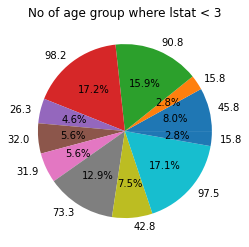

In [32]:
df.registerTempTable('HousingPrice')
sqlContext = SQLContext(spark)

df1 = sqlContext.sql("SELECT * from HousingPrice").toPandas()
df2 = sqlContext.sql("SELECT age, tax from HousingPrice where lstat < 3").toPandas()

fig = plt.pie(df2['age'], autopct='%1.1f%%',labels=df2['age'])
plt.title('No of age group where lstat < 3')
plt.show()

In [33]:
#df1.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
df1.corr().style.set_precision(2)

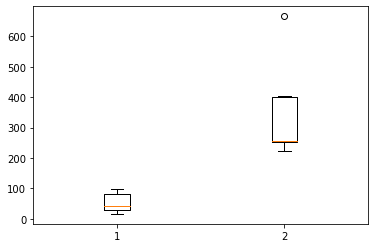

In [34]:
plt.boxplot(df2)
plt.show()

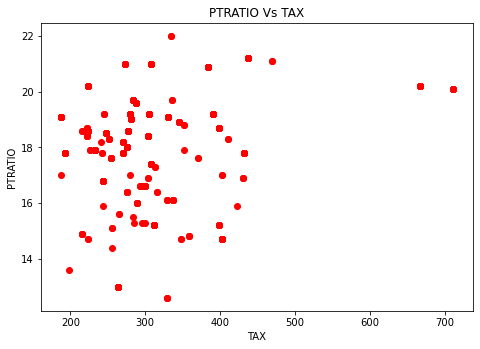

In [35]:
df3 = sqlContext.sql("SELECT PTRATIO, TAX from HousingPrice").toPandas()
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df3['TAX'],df3['PTRATIO'], color='r')
ax.set_xlabel('TAX')
ax.set_ylabel('PTRATIO')
ax.set_title('scatter plot')
plt.title('PTRATIO Vs TAX')
plt.show()
